<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<h1>Sample Starting Kit </h1>
   

<br>This code was tested with <br>
Python 3.7 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>

</center>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>
Iris is a small standard multivariable regression data set from the <a href="http://archive.ics.uci.edu/ml/datasets/">UCI Machine Learning Repository</a>, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features


In [8]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
</div>

In [2]:
data_dir = 'sample_data'              # Change this to the directory where you put the input data
#data_dir = '../FILES/iris/'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!ls $data_dir*

'ls' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [3]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading sample_data/xporters_train from AutoML format
Number of examples = 35
Number of features = 58


In [4]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_main_Clear,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,297.65,0.0,0.0,1,4,22,9,2018,1,...,0,0,0,0,0,0,0,0,0,2810.0
1,0,275.61,0.0,0.0,90,2,0,4,2018,0,...,0,0,0,0,0,0,0,0,0,826.0
2,0,278.15,0.0,0.0,64,5,5,11,2013,0,...,0,0,0,0,0,0,0,0,0,770.0
3,0,258.71,0.0,0.0,75,0,19,12,2016,0,...,0,0,0,0,0,0,0,0,0,2780.0
4,0,270.40,0.0,0.0,90,1,6,3,2013,0,...,0,0,0,0,0,0,0,0,0,5496.0


In [5]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_main_Clear,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,35.0,35.00000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.000000
mean,0.0,280.45800,0.260857,0.0,50.000000,2.771429,11.800000,5.685714,2015.371429,0.257143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3009.942857
std,0.0,12.52134,1.203801,0.0,37.844107,2.101620,7.419371,3.084796,1.895594,0.443440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2103.860065
min,0.0,250.90000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2013.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.000000
25%,0.0,270.51500,0.000000,0.0,3.000000,1.000000,5.500000,3.000000,2014.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903.500000
50%,0.0,284.61000,0.000000,0.0,64.000000,2.000000,11.000000,5.000000,2015.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2780.000000
75%,0.0,290.11000,0.000000,0.0,90.000000,5.000000,18.500000,8.000000,2017.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4772.000000
max,0.0,299.98000,7.110000,0.0,92.000000,6.000000,23.000000,12.000000,2018.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6817.000000


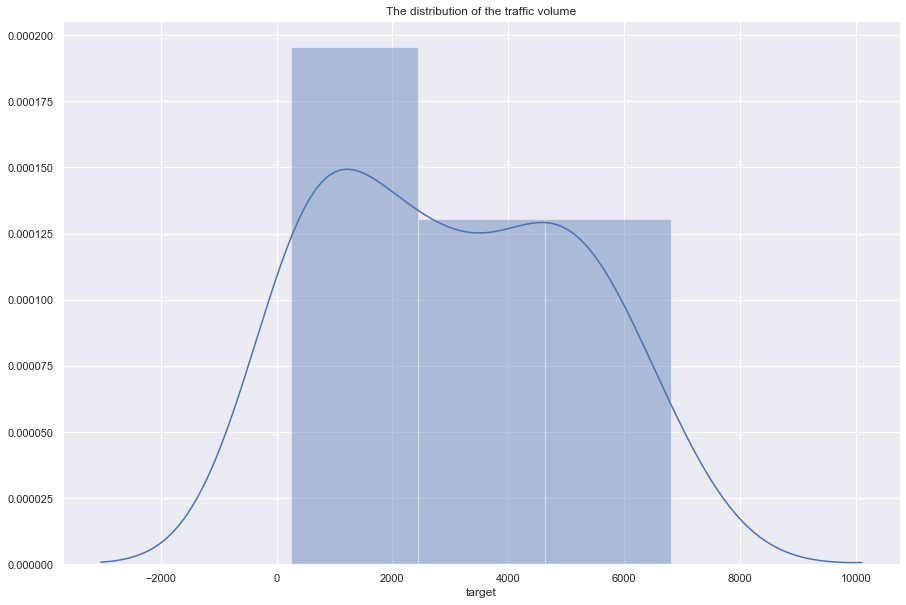

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.distplot(data['target'])
plt.title('The distribution of the traffic volume')
plt.show()

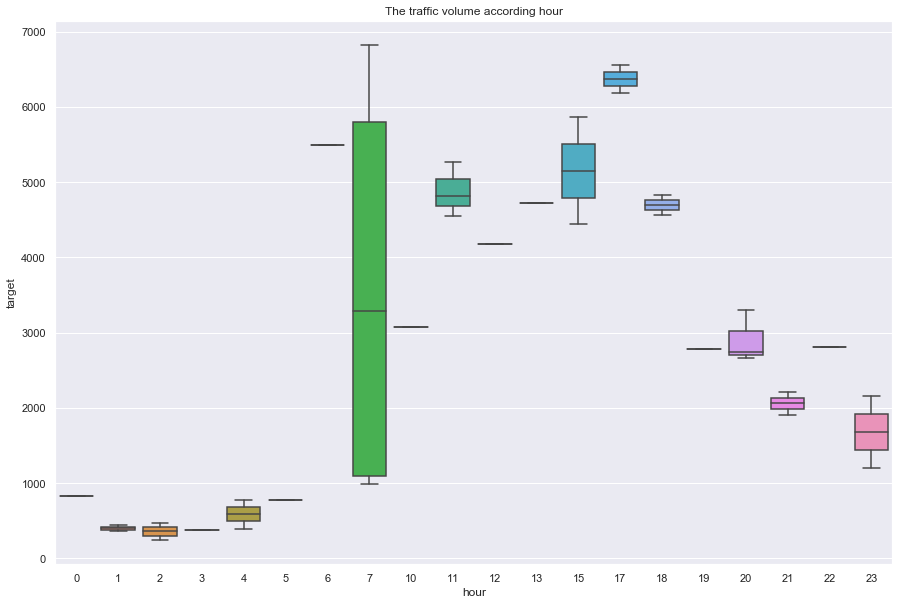

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot('hour','target', data= data)
plt.title('The traffic volume according hour')
plt.show()

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [18]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : C:\Users\berte\Desktop\projet_AIC\ProjetAIC\starting_kit\sample_data\xporters_public.info
DataManager : xporters
info:
	usage = Sample dataset Traffic Volume data
	name = traffic
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 58
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(35, 58)
	Y_train = array(35,)
	X_valid = array(35, 58)
	Y_valid = array(35,)
	X_test = array(35, 58)
	Y_test = array(35,)
feat_type:	array(58,)
feat_idx:	array(0,)



<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [19]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
model 

model.model

<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [20]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [22]:
if not(M.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

PREDICT: dim(X)= [35, 58]
PREDICT: dim(y)= [35, 1]
PREDICT: dim(X)= [35, 58]
PREDICT: dim(y)= [35, 1]
PREDICT: dim(X)= [35, 58]
PREDICT: dim(y)= [35, 1]


In [26]:
print(Y_hat_train)

[2662.97  763.96  994.42 3266.7  3998.12 1810.43 4173.7  4869.28  437.71
  412.17 5101.46 2930.26 4407.41  573.22 5850.85 4827.66 5523.21  583.64
 4744.55  470.66 1699.77 5893.4  5983.64 2870.34 5051.52 4217.39 2375.29
 1734.47 4343.81 2346.91  667.19  443.7  2849.67 2383.95 3067.96]


<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [23]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [25]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy_score


<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [14]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy_score metric = 0.4571
Ideal score for the accuracy_score metric = 1.0000


You can add here other scores and result visualization.

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[16,  0,  0],
       [ 4,  0,  0],
       [15,  0,  0]])

<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [16]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [28, 4]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 4]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 4]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 4]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 4]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 4]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 4]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 4]
PREDICT: dim(y)= [7, 1]
FIT: dim(X)= [28, 4]
FIT: dim(y)= [28, 1]
PREDICT: dim(X)= [7, 4]
PREDICT: dim(y)= [7, 1]

CV score (95 perc. CI): 0.46 (+/- 0.33)


<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [17]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2019/M2AIC/class_material/iris_py3/sample_data
Using output_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2019/M2AIC/class_material/iris_py3/sample_result_submission
Using program_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2019/M2AIC/class_material/iris_py3/ingestion_program
Using submission_dir: /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2019/M2AIC/class_material/iris_py3/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Iris ********
************************************************
========= Reading and converting data ==========
Info file found : /Users/isabelleguyon/Documents/Projects/ParisSaclay/Enseignement/Winter2019/M2AIC/class_material/iris_py3/sample_data/iris_public.info
========= Reading /Users/isa

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [18]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Iris_test): accuracy_score(set1_score)=0.371428571429 =======
======= Set 2 (Iris_train): accuracy_score(set2_score)=0.457142857143 =======
======= Set 3 (Iris_valid): accuracy_score(set3_score)=0.314285714286 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [19]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_18-11-14-14-54.zip
../sample_result_submission_18-11-14-14-54.zip
